In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load dataset CIFAR-10
dataset_name = "cifar10"
dataset, info = tfds.load(dataset_name, as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.4FFDRM_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.4FFDRM_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [3]:
# Preprocessing function
def preprocess(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)  # Normalisasi [0,1]
    return image, label

In [4]:
# Load train dan test dataset
train_dataset = dataset['train'].map(preprocess).batch(128).shuffle(10000)
test_dataset = dataset['test'].map(preprocess).batch(128)

In [5]:
# Membangun model MLP
model_mlp = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Compile model
model_mlp.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [7]:
# Training model
history_mlp = model_mlp.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.2297 - loss: 2.1363 - val_accuracy: 0.3608 - val_loss: 1.7830
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.3411 - loss: 1.8237 - val_accuracy: 0.4084 - val_loss: 1.6844
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.3648 - loss: 1.7630 - val_accuracy: 0.3800 - val_loss: 1.7093
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.3792 - loss: 1.7149 - val_accuracy: 0.4156 - val_loss: 1.6322
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.3918 - loss: 1.6821 - val_accuracy: 0.4259 - val_loss: 1.6078
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.3964 - loss: 1.6701 - val_accuracy: 0.4306 - val_loss: 1.6057
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.4062 - loss: 1.6442 - val_accuracy: 0.4346 - val_loss: 1.5699
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.4162 - loss: 1.6321 - 

In [8]:
# Evaluasi model
y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model_mlp.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f'MLP Test Accuracy: {accuracy:.4f}')
print(f'MLP Precision: {precision:.4f}')
print(f'MLP Recall: {recall:.4f}')
print(f'MLP F1 Score: {f1:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━

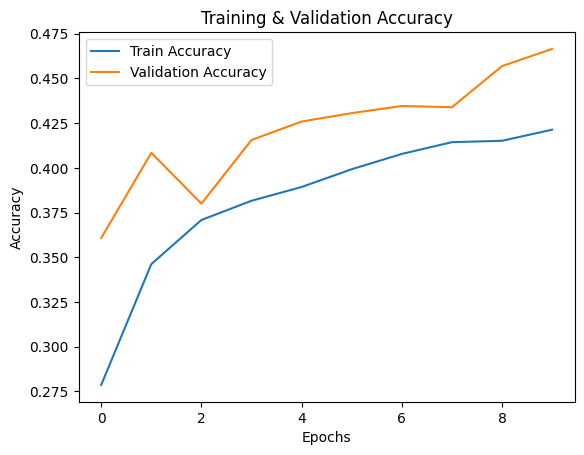

In [9]:
# Plot Akurasi
plt.plot(history_mlp.history['accuracy'], label='Train Accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.show()